In [21]:
import pandas as pd
import altair as alt

In [76]:
df = pd.read_csv('./costs.csv')
df['date_start'] = pd.to_datetime(df['date_start'], format="%Y-%m-%d")
df.head()

,date_start,name,category,subcategory,country,city,cost,transaction
0,2018-09-09,Aus to Denmark flight,transport,flight,NaN,NaN,871.51,NaN
1,2018-09-10,Dubai airport lunch,food,lunch,UAE,Dubai,13.17,NaN
2,2018-09-11,CPH metro ticket,transport,train,Denmark,Copenhagen,17.38,NaN
3,2018-09-10,Copenhagen airbnb,accomodation,accomodation,Denmark,Copenhagen,131.52,NaN
4,2018-09-11,Reykjavik airbnb,accomodation,accomodation,Iceland,Reykjavik,90.99,NaN


In [55]:
countries = df.groupby('country').agg('sum').sort_values(by='cost', ascending=False)
countries

,cost
country,
Denmark,2201.615000
Norway,2130.453333
Iceland,2005.850000
Sweden,31.760000
UAE,13.170000


In [56]:
without_transport = df[df.category != 'transport']
cities = without_transport.groupby('city').agg('sum').sort_values(by = 'cost', ascending = False)
cities

,cost
city,
Copenhagen,809.685000
Aarhus,400.115000
Reykjavik,352.415000
Loen,296.750000
Oslo,275.645000
Bergen,268.443333
Bornholm,240.145000
Akureyri,183.765000
Hofn,172.355000


In [57]:
categories = df.groupby('category').agg('sum').sort_values(by = 'cost', ascending = False)
categories

,cost
category,
transport,4446.325000
accomodation,2123.078333
food,1024.675000
attractions,517.550000
present,208.430000
photography,162.570000
communication,81.910000


In [64]:
food = df[df.category == 'food']
food_cats = food.groupby('subcategory').agg('sum').sort_values(by = 'cost', ascending = False)
food_cats

,cost
subcategory,
dinner,368.455
groceries,219.580
lunch,201.765
snacks,105.630
drinks,78.640
breakfast,50.605


In [68]:
accom = df[df.category == 'accomodation']
accom_countries_mean = accom.groupby('country').agg('mean')
accom_countries_sum = accom.groupby('country').agg('sum')


In [69]:
accom_countries_mean

,cost
country,
Denmark,90.170000
Iceland,92.215625
Norway,83.795926


In [70]:
accom_countries_sum

,cost
country,
Denmark,631.190000
Iceland,737.725000
Norway,754.163333


In [81]:
by_day = without_transport.groupby('date_start').agg('sum').sort_values(by = 'date_start').reset_index()
by_day

,date_start,cost
0,2018-09-10,388.105000
1,2018-09-11,147.885000
2,2018-09-12,210.785000
3,2018-09-13,209.355000
4,2018-09-14,175.210000
5,2018-09-15,151.145000
6,2018-09-16,174.170000
7,2018-09-17,64.895000
8,2018-09-18,173.945000
9,2018-09-19,124.490000


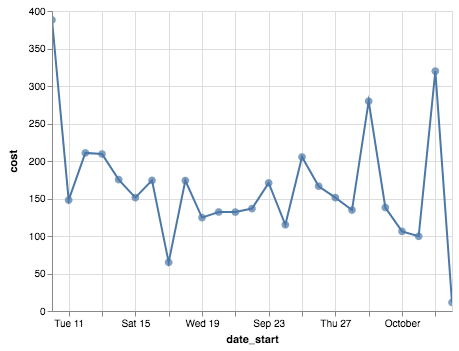

In [91]:
line = alt.Chart(by_day).mark_line().encode(
    y='cost',
    x='date_start'
).interactive()

circles = alt.Chart(by_day).mark_circle(size = 60).encode(
    y='cost',
    x='date_start',
    tooltip=['cost']
)

alt.layer(line, circles)